## K-mean clustering 
### A numerical example 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import euclidean_distances
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

Here we imprort the required python packages, as we are implementing 
a simple k-means clustering from scratch, we use numpy to create arrays,
then matplotlib to show the point or clusters graphically. Then we have imported 
euclidean_distances from sklearn to measure distances between each point 
to the centroid. 

In [ ]:
d = np.array([[1,1],[1,2],[2,1],[4,3],[3,4],[5,4]])
print(d)
print("shape of d is : {}".format(d.shape))
plt.scatter(d[:,0],d[:,1])

d contains the data points, and we are plotting using scatter plot

[[ 2.1  1.5]
 [ 5.   1. ]]


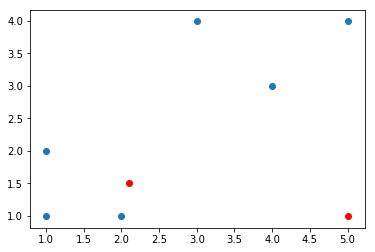

In [244]:
# initialize the centroids
c1 = np.array([2.1,1.5])
c2 = np.array([5,1])
C = np.c_[c1,c2].T
print(C)
# find euclidean distance between the points and centroids
plt.scatter(d[:,0],d[:,1])
plt.scatter(C[:,0],C[:,1],color='r')
# C[:,0] represents the x values and ,C[:,1] represents the y-values
# C[:,0] = (1,1), C[:,1]=(2,1)

Here we initializing the centroids(randomely), then plotting over the data in a different color(red).

In [242]:
def dist(d,C):
    """
    Distance between the data paoint to the centroid
    """
    S = []
    for i in range(len(C)):
        s = euclidean_distances(d,C[i])
        S.append(s)
    print(S[0].T)
    print(S[1].T)
    return S


def updateCentroids(S):
    # find the groups 
    
    g1 = (S[0]<S[1]).astype('float')
    g2 = (S[1]<S[0]).astype('float')
    # computing new centroids
    c1 = np.sum(g1*d,axis=0)/sum(g1*d>0).astype('float')
    c2 = np.sum(g2*d,axis=0)/sum(g2*d>0).astype('float')
    C = np.c_[c1,c2].T
    # print(c1,c2)
    print("new centroids{}{}".format(c1,c2))
    plt.scatter(d[:,0],d[:,1])
    plt.scatter(C[:,0],C[:,1],color='r')
    
    return C

These are the two helper function, we use to find the distance between 
points and cenroids and update the centroids based on distances. 

[[ 1.2083046   1.2083046   0.50990195  2.42074369  2.65706605  3.82883794]]
[[ 4.          4.12310563  3.          2.23606798  3.60555128  3.        ]]
new centroids[ 1.75  2.  ][ 4.5  3.5]


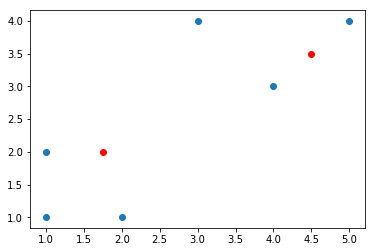

In [243]:
S = dist(d,C)
C = updateCentroids(S)

The centroids are updated, and see they are getting closer to the clusters.

[[ 1.2083046   1.2083046   0.50990195  2.42074369  2.65706605  3.82883794]]
[[ 4.          4.12310563  3.          2.23606798  3.60555128  3.        ]]
new centroids[ 1.75  2.  ][ 4.5  3.5]


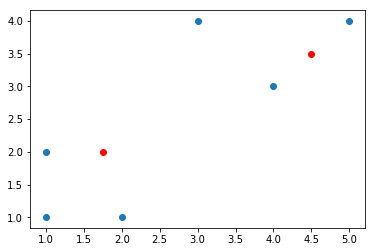

In [245]:
S = dist(d,C)
C = updateCentroids(S)

[[ 1.25        0.75        1.03077641  2.46221445  2.35849528  3.81608438]]
[[ 4.30116263  3.80788655  3.53553391  0.70710678  1.58113883  0.70710678]]
new centroids[ 1.33333333  1.33333333][ 4.          3.66666667]


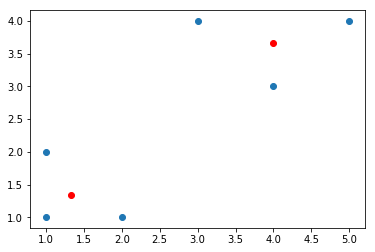

In [246]:
S = dist(d,C)
C = updateCentroids(S)

In [ ]:
Ahha..!!! look at the perfectness. you can repeat the process few more times.
But the algorithm finds the best centroids. So the above plot will be repeated. 


In [247]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(d)

In [248]:
kmeans.labels_

array([1, 1, 1, 0, 0, 0], dtype=int32)

It is just to confirm our approach with sklearn k-means clustering. I think we did well. 